In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics  as sts
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')


In [3]:
df=df.drop(['id'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
#Gender
df.groupby(['gender']).size()

gender
Female    2994
Male      2115
Other        1
dtype: int64

In [6]:
df['gender']=df['gender'].replace('Other', 'Female')


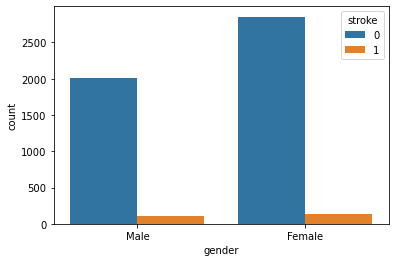

In [7]:
sns.countplot(df.gender, hue=df.stroke)

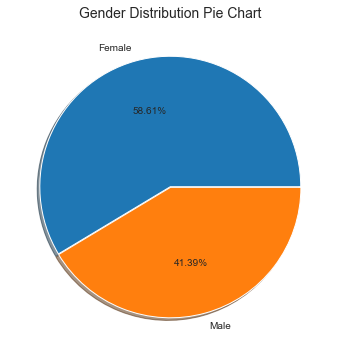

In [8]:
labels = df['gender'].value_counts().index.tolist()[:2]
values = df['gender'].value_counts().tolist()[:2]
sns.set_style('darkgrid')
plt.figure(figsize=[12,6])
plt.pie(x=values, labels=labels, autopct="%1.2f%%", explode=[0, 0.005], shadow=True)
plt.title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

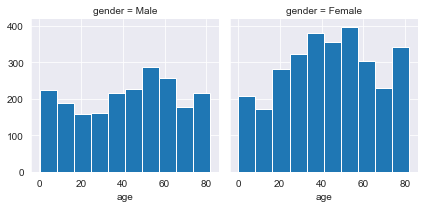

In [9]:
g = sns.FacetGrid(data=df,col='gender')
g.map(plt.hist,'age')

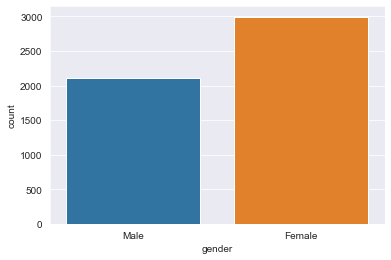

In [10]:
sns.countplot(df.gender)

In [11]:
df['gender']=df['gender'].replace('Male',1)
df['gender']=df['gender'].replace('Female',0)

In [12]:
#Age
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [13]:
df['age'].isna().sum()

0

Text(0.5, 1.0, 'Distribution of Ages')

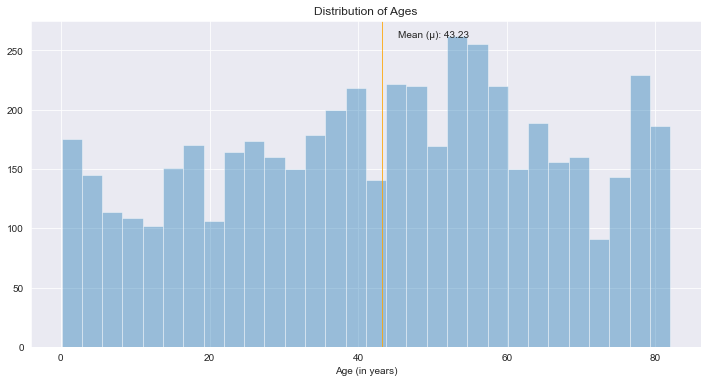

In [14]:
plt.figure(figsize=[12,6])
sns.distplot(df.age, bins=30, kde=False)
plt.axvline(df['age'].mean(), color='orange', linestyle='-', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(df['age'].mean()*1.05, max_ylim*0.95, 'Mean (μ): {:.2f}'.format(df['age'].mean()))
plt.xlabel("Age (in years)")
plt.title(f"Distribution of Ages")

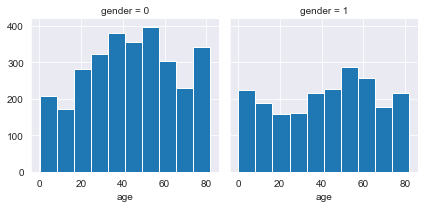

In [15]:
g = sns.FacetGrid(data=df,col='gender')
g.map(plt.hist,'age')

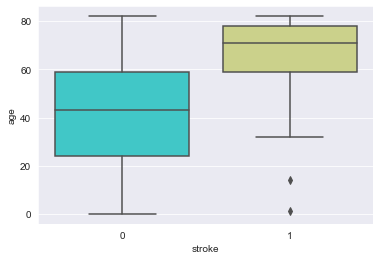

In [16]:
sns.boxplot(x="stroke", y="age", data=df,palette='rainbow')

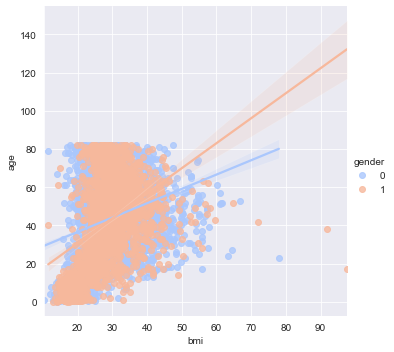

In [17]:
sns.lmplot(x='bmi',y='age',hue='gender',data=df,palette='coolwarm')

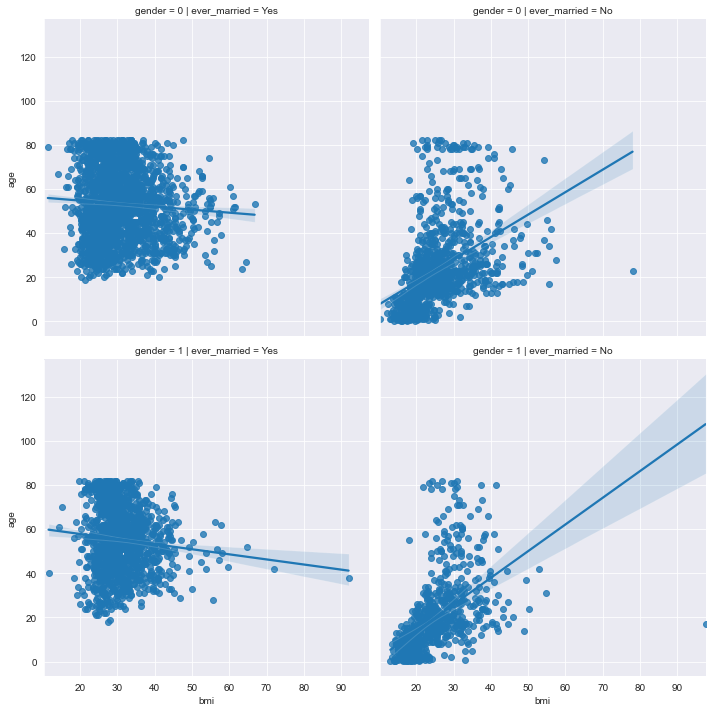

In [18]:
sns.lmplot(x='bmi',y='age',row='gender',col='ever_married',data=df,palette='coolwarm')

In [53]:
df['age']=df['age'].astype(int)

In [19]:
#hypertension
df.groupby(['hypertension']).size()

hypertension
0    4612
1     498
dtype: int64

Text(0.5, 1.0, 'Hypertension')

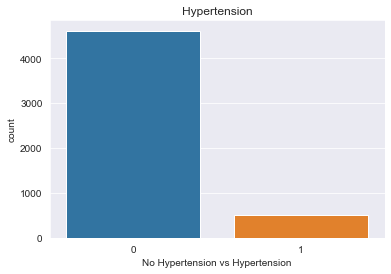

In [20]:
sns.countplot(df.hypertension)
plt.xlabel('No Hypertension vs Hypertension')
plt.title('Hypertension')

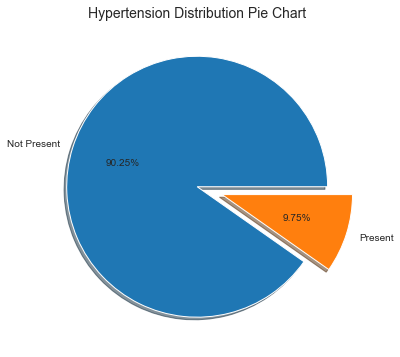

In [21]:
plt.figure(figsize=[12,6])
labels = ["Not Present", "Present"]
values = df['hypertension'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
plt.title("Hypertension Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()


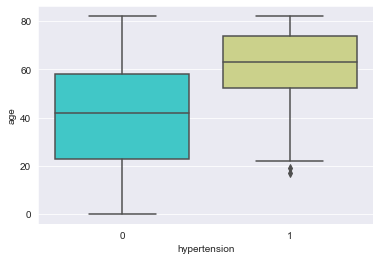

In [22]:
sns.boxplot(x="hypertension", y="age", data=df,palette='rainbow')

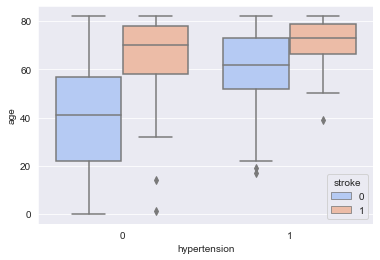

In [23]:
sns.boxplot(x="hypertension", y="age", hue='stroke',data=df,palette='coolwarm')

In [24]:
#heart_disease 
df.groupby(['heart_disease']).size()

heart_disease
0    4834
1     276
dtype: int64

Text(0.5, 1.0, 'Heart Disease')

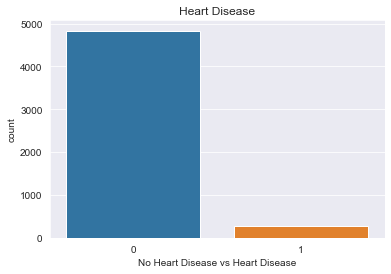

In [25]:
sns.countplot(df.heart_disease)
plt.xlabel('No Heart Disease vs Heart Disease')
plt.title('Heart Disease')

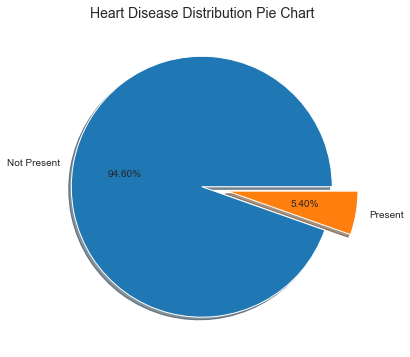

In [26]:
plt.figure(figsize=[12,6])
labels = ["Not Present", "Present"]
values = df['heart_disease'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
plt.title("Heart Disease Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

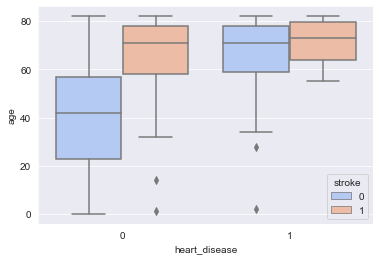

In [27]:
sns.boxplot(x="heart_disease", y="age", hue='stroke',data=df,palette='coolwarm')

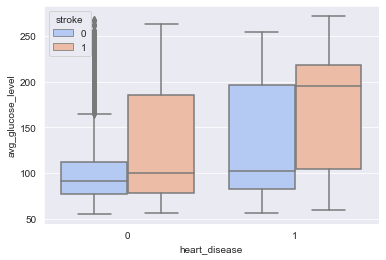

In [28]:
sns.boxplot(x="heart_disease", y="avg_glucose_level", hue='stroke',data=df,palette='coolwarm')

In [29]:
#ever_married 
df.groupby(['ever_married']).size()

ever_married
No     1757
Yes    3353
dtype: int64

Text(0.5, 1.0, 'Marriage Status')

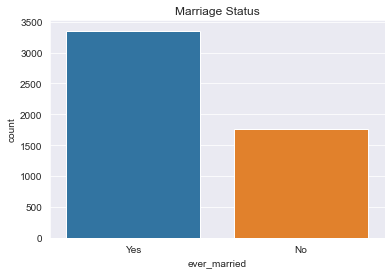

In [30]:
sns.countplot(df.ever_married)

plt.title('Marriage Status')

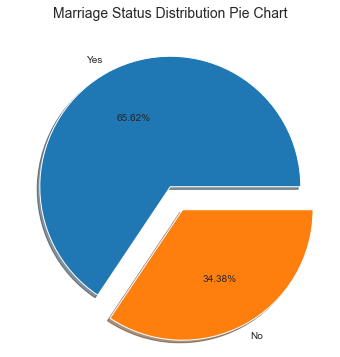

In [31]:
plt.figure(figsize=[12,6])
labels = ["Yes", "No"]
values = df['ever_married'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
plt.title("Marriage Status Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

In [32]:
df['ever_married']=df['ever_married'].replace('Yes', 1)
df['ever_married']=df['ever_married'].replace('No', 0)
df.groupby(['ever_married']).size()

ever_married
0    1757
1    3353
dtype: int64

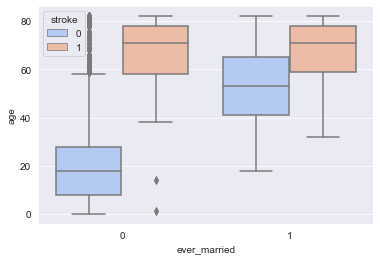

In [33]:
sns.boxplot(x="ever_married", y="age", hue='stroke',data=df,palette='coolwarm')

In [72]:
#work_type
df.groupby(['work_type']).size()

work_type
1     687
2      22
3     657
4    2925
5     819
dtype: int64

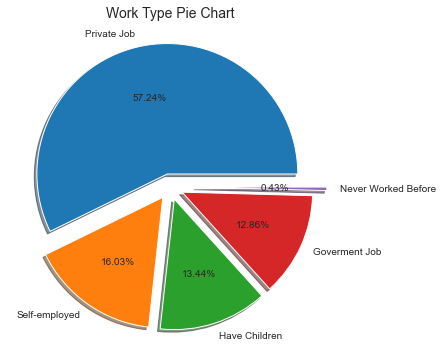

In [35]:
plt.figure(figsize=[12,6])
labels = ["Private Job", "Self-employed", "Have Children", "Goverment Job", "Never Worked Before"]
values = df['work_type'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.2])
plt.title("Work Type Pie Chart", fontdict={'fontsize': 14})
plt.show()

Text(0.5, 1.0, 'Work Type')

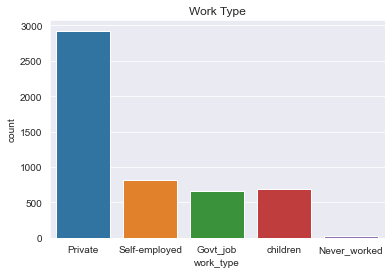

In [36]:
sns.countplot(df.work_type)

plt.title('Work Type')

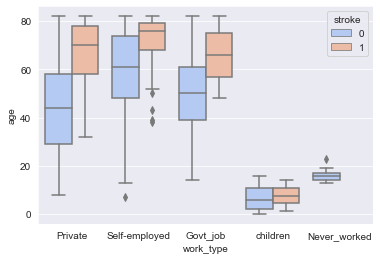

In [37]:
sns.boxplot(x="work_type", y="age", hue='stroke',data=df,palette='coolwarm')

In [71]:
df['work_type'] = df['work_type'].replace('children', 1)
df['work_type'] = df['work_type'].replace('Never_worked', 2)
df['work_type'] = df['work_type'].replace('Govt_job', 3)
df['work_type'] = df['work_type'].replace('Private', 4)
df['work_type'] = df['work_type'].replace('Self-employed', 5)

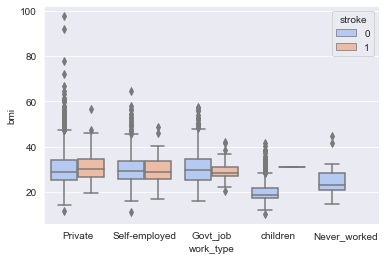

In [38]:
sns.boxplot(x="work_type", y="bmi", hue='stroke',data=df,palette='coolwarm')

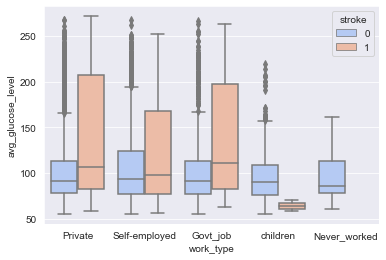

In [39]:
sns.boxplot(x="work_type", y="avg_glucose_level", hue='stroke',data=df,palette='coolwarm')

In [40]:
#avg_glucose_level
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

Text(0.5, 1.0, 'Distribution of Glucose Level')

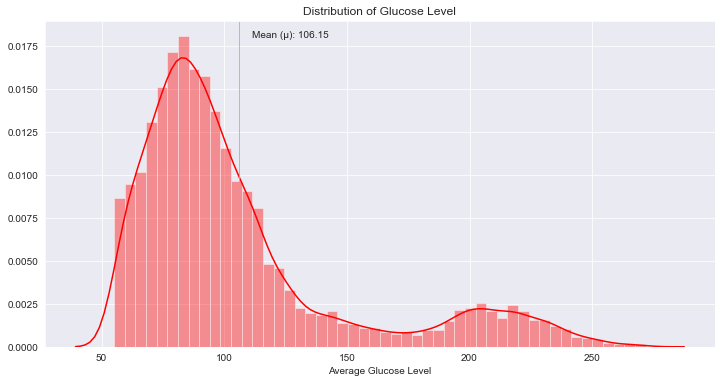

In [41]:
plt.figure(figsize=[12,6])
sns.distplot(df.avg_glucose_level, kde=True, color='red')
plt.axvline(df['avg_glucose_level'].mean(), color='orange', linestyle='-', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(df['avg_glucose_level'].mean()*1.05, max_ylim*0.95, 'Mean (μ): {:.2f}'.format(df['avg_glucose_level'].mean()))
plt.xlabel("Average Glucose Level")
plt.title(f"Distribution of Glucose Level")

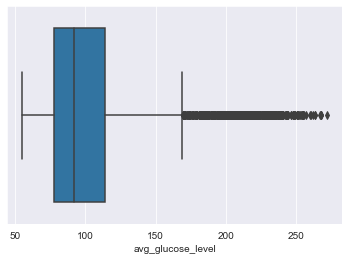

In [42]:
sns.boxplot(df.avg_glucose_level)

In [65]:
df['avg_glucose_level']=df['avg_glucose_level'].astype(int)

In [43]:
#bmi
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [58]:
df['bmi'].isna().sum()

201

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [59]:
median_bmi = sts.median(df['bmi'])
median_bmi


45.75

In [ ]:
avg_bmi = sts.mean(df['bmi'])
avg_bmi

In [60]:
df['bmi'].fillna(median_bmi, inplace=True)

In [61]:
df['bmi'].isna().sum()

0

In [62]:
df['bmi'].describe()

count    5110.000000
mean       29.556292
std         8.366534
min        10.300000
25%        23.800000
50%        28.400000
75%        34.000000
max        97.600000
Name: bmi, dtype: float64

Text(0.5, 1.0, 'Distribution of Body Mass Index')

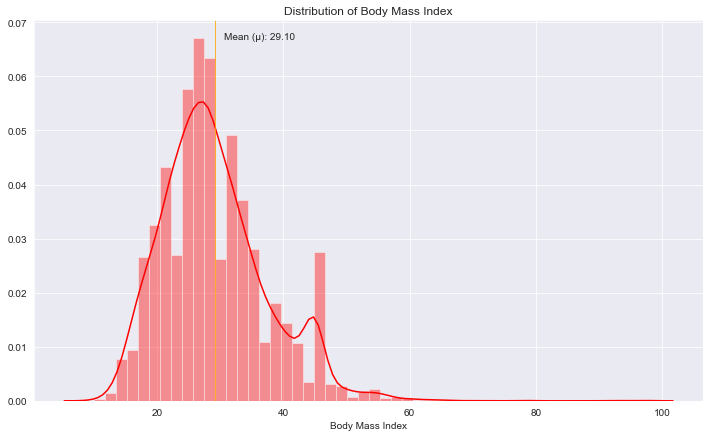

In [64]:
plt.figure(figsize=[12,7])
sns.distplot(df.bmi, kde=True, color='red')
plt.axvline(df['bmi'].mean(), color='orange', linestyle='-', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(df['bmi'].mean()*1.05, max_ylim*0.95, 'Mean (μ): {:.2f}'.format(df['bmi'].mean()))
plt.xlabel("Body Mass Index")
plt.title(f"Distribution of Body Mass Index")

In [63]:
df['bmi']=df['bmi'].astype(int)

In [ ]:
#smoking_status
df.groupby(['smoking_status']).size()

In [ ]:
plt.figure(figsize=[12,6])
labels = ["Never Smoked Before", "Unknown", "Ex-Smoker", "Currently Smokes"]
values = df['smoking_status'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Smoking Status Pie Chart", fontdict={'fontsize': 14})
plt.show()

Text(0.5, 1.0, 'Smoking Status')

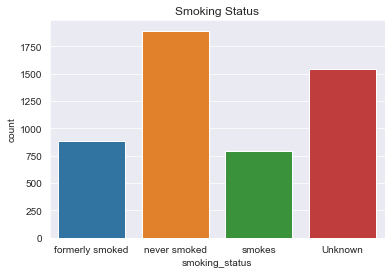

In [113]:
sns.countplot(df.smoking_status)

plt.title('Smoking Status')

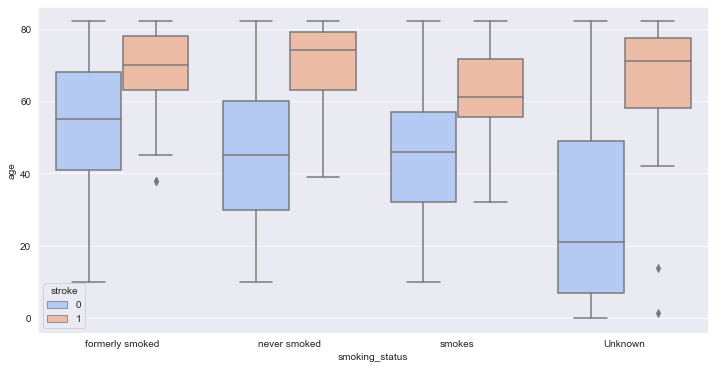

In [114]:
plt.figure(figsize=[12,6])
sns.boxplot(x="smoking_status", y="age", hue='stroke',data=df,palette='coolwarm')

In [66]:
df['smoking_status'] = df['smoking_status'].replace('never smoked', 1)
df['smoking_status'] = df['smoking_status'].replace('formerly smoked', 2)
df['smoking_status'] = df['smoking_status'].replace('Unknown', 3)
df['smoking_status'] = df['smoking_status'].replace('smokes', 4)

In [115]:
#Residence_type 
df.groupby(['Residence_type']).size()

Residence_type
Rural    2514
Urban    2596
dtype: int64

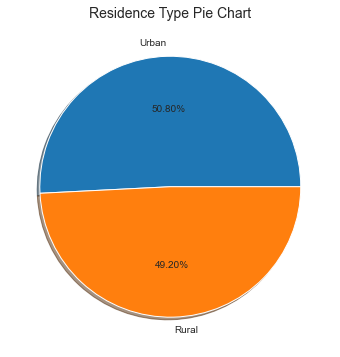

In [116]:
plt.figure(figsize=[12,6])
labels = ["Urban","Rural"]
values = df['Residence_type'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Residence Type Pie Chart", fontdict={'fontsize': 14})
plt.show()

Text(0.5, 1.0, 'Residence Type')

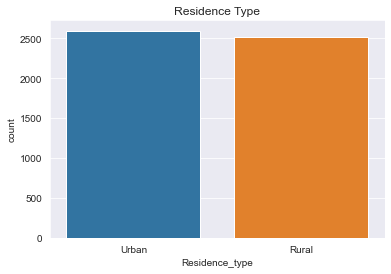

In [117]:
sns.countplot(df.Residence_type)

plt.title('Residence Type')

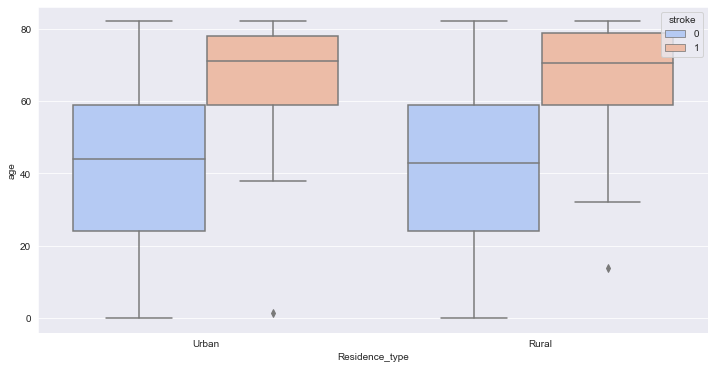

In [118]:
plt.figure(figsize=[12,6])
sns.boxplot(x="Residence_type", y="age", hue='stroke',data=df,palette='coolwarm')

In [55]:
df['Residence_type']=df['Residence_type'].replace('Urban', 1)
df['Residence_type']=df['Residence_type'].replace('Rural', 0)

In [119]:
#stroke
df.groupby(['stroke']).size()

stroke
0    4861
1     249
dtype: int64

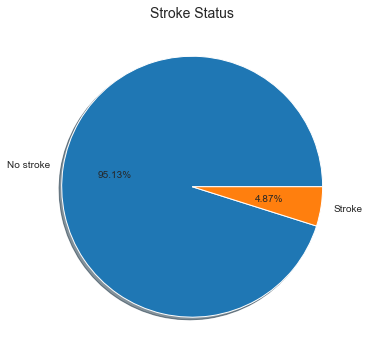

In [120]:
plt.figure(figsize=[12,6])
labels = ["No stroke","Stroke"]
values = df['stroke'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Stroke Status", fontdict={'fontsize': 14})
plt.show()

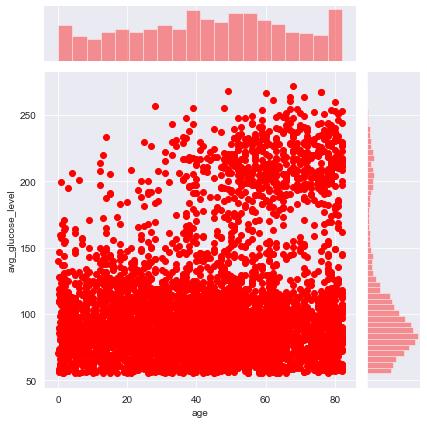

In [121]:
#Relationship between Age and Average Glucose Level
sns.jointplot(x='age',y='avg_glucose_level',data=df, color='red')

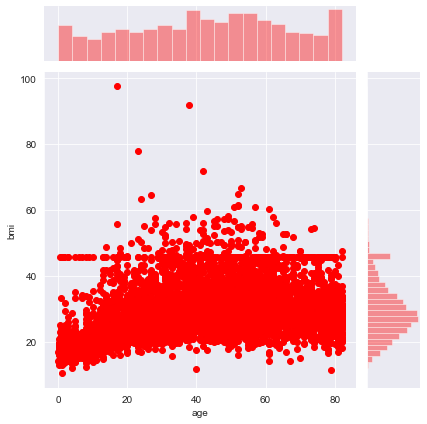

In [122]:
#Relationship between Age and Body Mass Index
sns.jointplot(x='age',y='bmi',data=df, color='red')

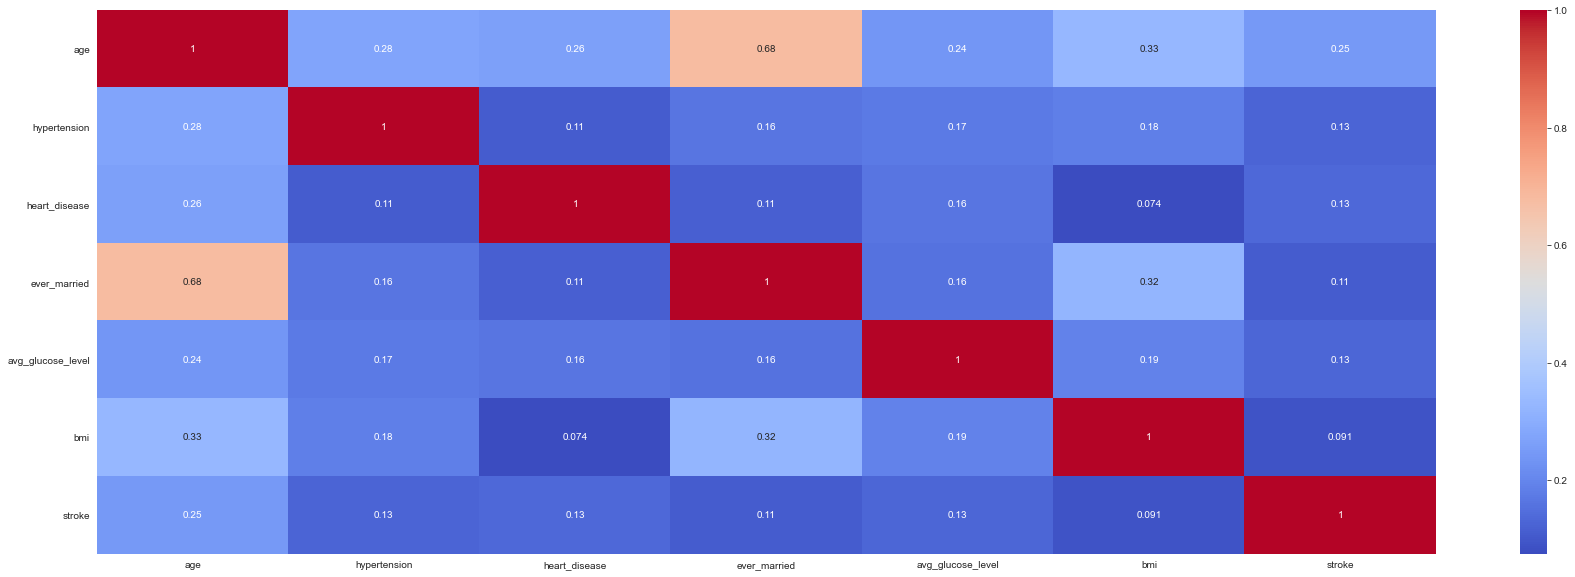

In [124]:
# Correlation
corr = df.corr()
plt.figure(figsize=[30,10])
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             5110 non-null   int64
 1   age                5110 non-null   int32
 2   hypertension       5110 non-null   int64
 3   heart_disease      5110 non-null   int64
 4   ever_married       5110 non-null   int64
 5   work_type          5110 non-null   int64
 6   Residence_type     5110 non-null   int64
 7   avg_glucose_level  5110 non-null   int32
 8   bmi                5110 non-null   int32
 9   smoking_status     5110 non-null   int64
 10  stroke             5110 non-null   int64
dtypes: int32(3), int64(8)
memory usage: 379.4 KB


In [74]:
# Preparation to run the machine learning models
x=df.drop(['stroke'], axis=1)
y=df['stroke']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, 
                                                    random_state=101)

In [76]:
##Logistic Regression

lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)

C:\Users\vitor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [77]:
lr_pred=lr.predict(x_test)
print(classification_report(y_test, lr_pred))

print(confusion_matrix(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       0.00      0.00      0.00        87

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533

[[1446    0]
 [  87    0]]


C:\Users\vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


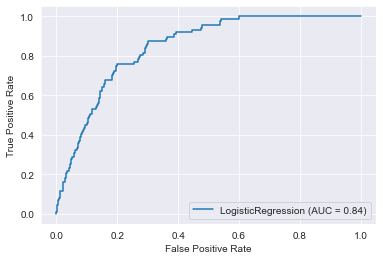

In [78]:
metrics.plot_roc_curve(lr, x_test, y_test)

In [79]:
##KNN Classifier

scaler=StandardScaler()
scaler.fit(df.drop('stroke', axis=1))
df_normalizado=scaler.transform(df.drop('stroke', axis=1))
df_param=pd.DataFrame(df_normalizado, columns=df.columns[:-1])
df_param.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.189990,1.050950,-0.328602,4.185032,0.723884,0.324683,0.984080,2.702438,0.828041,-0.216853
1,-0.840343,0.785835,-0.328602,-0.238947,0.723884,1.178583,-1.016178,2.128117,1.908033,-1.117760
2,1.189990,1.625367,-0.328602,4.185032,0.723884,0.324683,-1.016178,-0.014542,0.348044,-1.117760
3,-0.840343,0.255604,-0.328602,-0.238947,0.723884,0.324683,0.984080,1.443350,0.588043,1.584963
4,-0.840343,1.581181,3.043196,-0.238947,0.723884,1.178583,-1.016178,1.509618,-0.611949,-1.117760


In [80]:
x_train, x_test, y_train, y_test = train_test_split(
    df_param, df['stroke'], test_size=0.3, random_state=101)

In [81]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [83]:
knn_pred=knn.predict(x_test)
print(classification_report(y_test, knn_pred))

print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1446
           1       0.21      0.15      0.17        87

    accuracy                           0.92      1533
   macro avg       0.58      0.56      0.57      1533
weighted avg       0.91      0.92      0.91      1533

[[1396   50]
 [  74   13]]


In [84]:
error_rate= []

for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))

Text(0, 0.5, 'Error Rate')

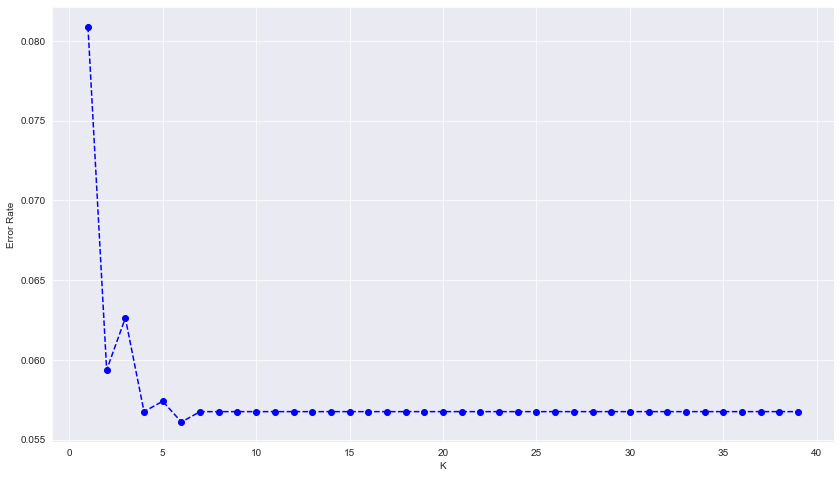

In [85]:
sns.set_style('darkgrid')
plt.figure(figsize=[14,8])
plt.plot(range(1,40), error_rate, color='blue',
        linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [86]:
    knn= KNeighborsClassifier(n_neighbors=6)
    knn.fit(x_train, y_train)
    knn_pred=knn.predict(x_test)
    
    print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       1.00      0.01      0.02        87

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533

[[1446    0]
 [  86    1]]


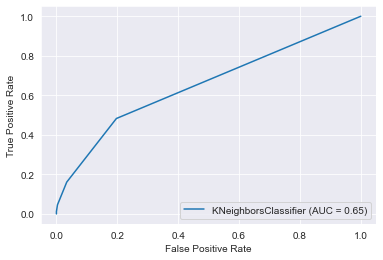

In [87]:
metrics.plot_roc_curve(knn, x_test, y_test)

In [88]:
## Decision Tree Classifier
x=df.drop(['stroke'], axis=1)
y=df['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, 
                                                    random_state=101)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       0.00      0.00      0.00        87

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



C:\Users\vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


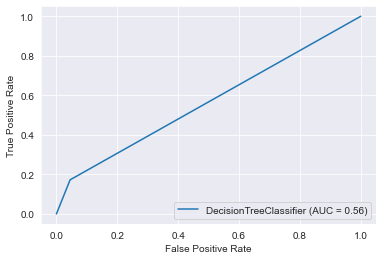

In [89]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree_pred=dtree.predict(x_test)
print(classification_report(y_test,pred))
metrics.plot_roc_curve(dtree, x_test, y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1446
           1       0.83      0.06      0.11        87

    accuracy                           0.95      1533
   macro avg       0.89      0.53      0.54      1533
weighted avg       0.94      0.95      0.92      1533



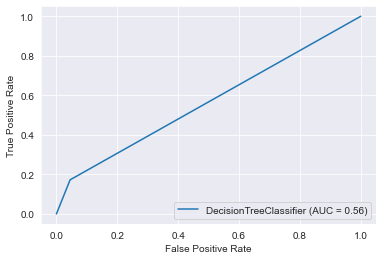

In [90]:
## Random Forest
rfc=RandomForestClassifier(n_estimators=600)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test, rfc_pred))
metrics.plot_roc_curve(dtree, x_test, y_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       0.00      0.00      0.00        87

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



C:\Users\vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


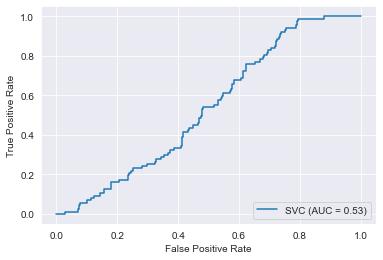

In [91]:
# Support Vector Machines
svm=SVC()
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print(classification_report(y_test,svm_pred))
metrics.plot_roc_curve(svm, x_test, y_test)

In [92]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
grid= GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [96]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.954, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.954, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.955, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.955, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.955, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.954, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.954, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.955, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.955, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.936, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.955, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.941, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.954, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.954, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.955, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.955, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.954, total=   4.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.954, total=   5.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.955, total=   2.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.955, total=   3.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.955, total=   5.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [97]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [98]:
forecast=grid.predict(x_test)
print(classification_report(y_test, forecast))

print(confusion_matrix(y_test, forecast))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1446
           1       0.60      0.03      0.07        87

    accuracy                           0.94      1533
   macro avg       0.77      0.52      0.52      1533
weighted avg       0.93      0.94      0.92      1533

[[1444    2]
 [  84    3]]
